In [1]:
import numpy as np
from IPython.core.display_functions import display
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
com_file = "./Linear_combination_crossover_normal/combinations_result_baseline.csv"
df_com = pd.read_csv(com_file,header=0)
df_com = df_com[:100]

In [3]:
opt = [0, 0, 0, 0, 0, 0, 0, -418.98 * 10, 0, 0, 0, 0, 0, 1, 0.00030, -1.0316, 0.398, 3, -3.86, -3.32, -10.1532, -10.4028, -10.5363]

In [4]:
file_name = ["Linear_combination_crossover_normal","Linear_combination_crossover_uniform",
            "Probabilistic_crossover_normal","Probabilistic_crossover_uniform",
            "singe_point_crossover_normal","singe_point_crossover_uniform"]
def read_file(name):
    path = "./"+ name + "/Baseline_table_long_100.csv"
    df1 = pd.read_csv(path,index_col=[0,1],header=0)
    df1.columns = [i for i in range(0,100)]
    df1["Type"]=name
    return df1
df = [read_file(name) for name in file_name]
df = pd.concat(df,axis=0)
df = df.rename_axis(index=["Function", "Times"])
df = df.sort_index(level="Function")


In [5]:
def plot_overview(Function,num_com,optimal):
    
    dataframe= df.loc[(Function,slice(None)), :]
    dataframe = dataframe.round(4)
    dataframe = pd.DataFrame(data=dataframe.values,
                 columns=dataframe.columns)
    columns = dataframe.columns.tolist()[:num_com]
    percent_dataframe = dataframe.loc[:,dataframe.columns!="Type"].applymap(lambda x:True if x==optimal else False)
    percent_dataframe["Type"] = dataframe["Type"]
    percent_df = percent_dataframe.groupby(["Type"]).sum().applymap(lambda x: str(x*10)+"%")
    display(percent_df)
    i=1
    max_value=dataframe.max(axis=0)
    min_value=dataframe.min(axis=0)
    
    dist_cols = 4
    dist_rows = 25
    plt.figure(figsize=(6*dist_cols,6*dist_rows))
    for col in columns:
        ax = plt.subplot(dist_rows,dist_cols,i)
        ax = sns.histplot(data=dataframe, x=col, hue="Type",multiple="dodge",stat="count",
                 binrange=(min_value[col],max_value[col]),binwidth=(max_value[col]-min_value[col])/15+0.0001)
        ax.set_xlabel("parameter conbination"+str(i))
        ax.set_ylabel("Count of optimals")
        i=i+1
    plt.savefig("./data_analysis_{0}.pdf".format(Function),dpi=1000)
    plt.show()
    
    i=1
    dist_cols = 4
    dist_rows = 25
    plt.figure(figsize=(6*dist_cols,6*dist_rows))
    for col in columns:
        ax = plt.subplot(dist_rows,dist_cols,i)
        ax = sns.histplot(data=percent_dataframe, x=col, hue="Type",multiple="dodge",stat="count",
                 binrange=(-3,3),binwidth=0.6)
        ax.set_xlabel("parameter conbination"+str(i))
        ax.set_ylabel("Count of optimals")
        ax.set_title("True:1 False:0")
        i=i+1
    plt.savefig("./percentage_{0}.pdf".format(Function),dpi=1000)
    plt.show()

0     1     2     3     4     5  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform   90%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal         90%   80%  100%  100%  100%  100%   
Probabilistic_crossover_uniform        10%   20%   20%  100%  100%  100%   
singe_point_crossover_normal            0%    0%    0%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                         6     7     8     9    10    11  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%   80%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%   90%   80%   20%   50%   40%   
Probabilistic_crossover_uniform       100%  100%  100%  100%  100%  100%   
singe_point_crossover_normal            0%    0%    0%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                        12    13    14   15   16   17    18  \
Type                                                                          
Linear_combination_crossover_normal    50%   80%   80%  20%  30%  10%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  70%  70%  90%  100%   
Probabilistic_crossover_normal          0%    0%    0%   0%   0%   0%  100%   
Probabilistic_crossover_uniform        70%   50%   80%  10%   0%   0%   20%   
singe_point_crossover_normal            0%    0%    0%   0%   0%   0%    0%   
singe_point_crossover_uniform           0%    0%    0%   0%   0%   0%    0%   

                                        19    20    21    22    23    24  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%  100%  100%  100%  100%   90%   
Probabilistic_crossover_uniform        40%   60%  100%  100%  100%  100%   
singe_point_crossover_normal            0%    0%    0%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                        25    26    27    28    29    30  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%   90%   80%   60%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal         90%   90%   30%   30%   40%    0%   
Probabilistic_crossover_uniform       100%  100%  100%  100%  100%   70%   
singe_point_crossover_normal            0%    0%    0%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                        31    32   33   34   35    36    37  \
Type                                                                          
Linear_combination_crossover_normal    50%   50%  30%  20%  40%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  80%  70%  70%  100%  100%   
Probabilistic_crossover_normal          0%   10%   0%   0%   0%   90%  100%   
Probabilistic_crossover_uniform        80%   60%  10%   0%   0%   80%   80%   
singe_point_crossover_normal            0%    0%   0%   0%   0%    0%    0%   
singe_point_crossover_uniform           0%    0%   0%   0%   0%    0%    0%   

                                        38    39    40    41    42    43  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal     

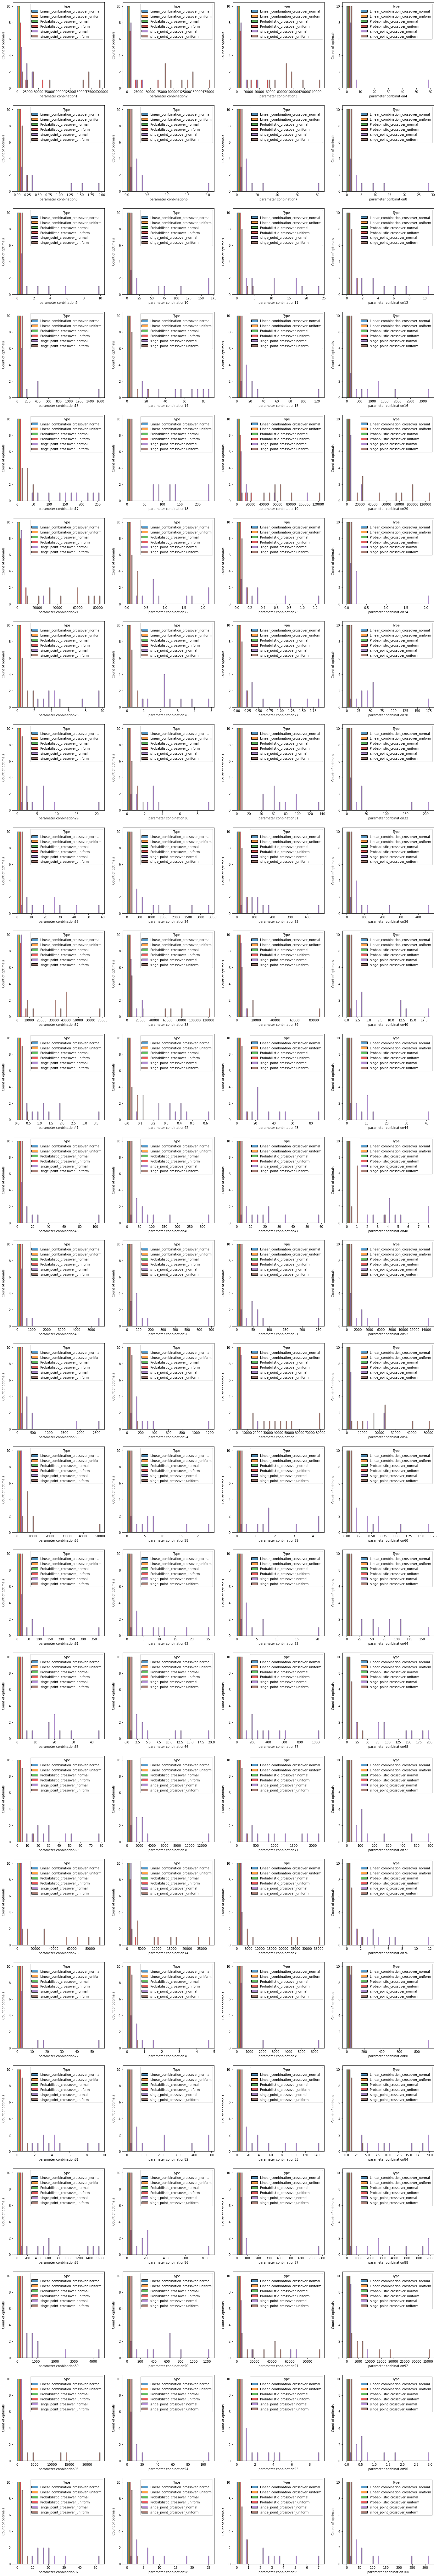

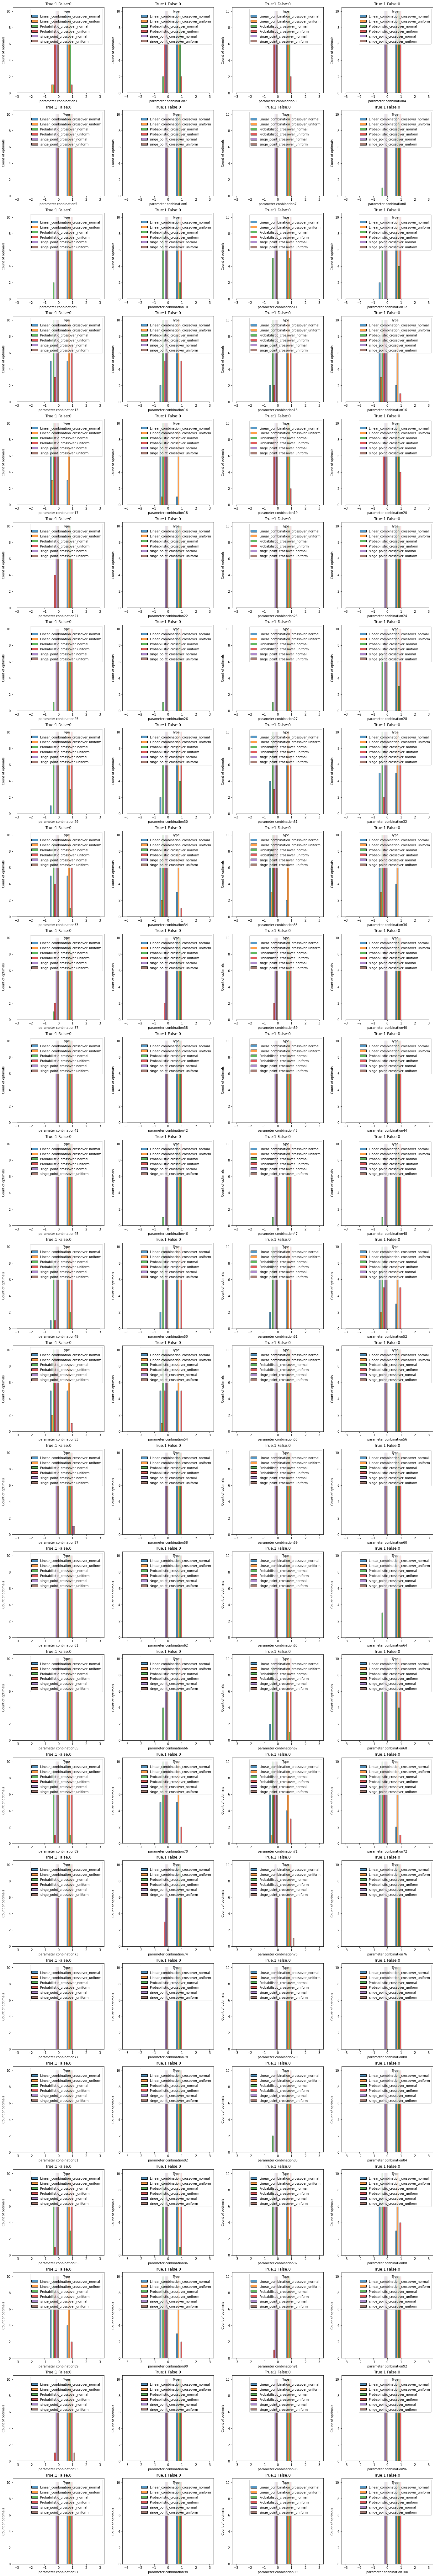

In [6]:
plot_overview(Function="F3",num_com=100,optimal=opt[2])

0     1     2     3     4     5  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform   90%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%  100%   70%  100%  100%  100%   
Probabilistic_crossover_uniform        40%   40%   20%  100%  100%  100%   
singe_point_crossover_normal           20%   50%   20%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                         6     7     8     9    10    11  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_uniform       100%  100%  100%  100%  100%  100%   
singe_point_crossover_normal            0%    0%    0%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                        12    13    14    15    16    17  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%   90%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%  100%  100%   60%   60%   70%   
Probabilistic_crossover_uniform       100%  100%  100%  100%  100%  100%   
singe_point_crossover_normal            0%    0%    0%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                        18    19    20    21    22    23  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_uniform        40%   60%   50%  100%  100%  100%   
singe_point_crossover_normal           20%   50%   80%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%   10%   20%   30%   

                                        24    25    26    27    28    29  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_uniform       100%  100%  100%  100%  100%  100%   
singe_point_crossover_normal            0%    0%    0%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                        30    31    32    33    34    35  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%  100%  100%   40%   70%   80%   
Probabilistic_crossover_uniform       100%  100%  100%  100%  100%  100%   
singe_point_crossover_normal            0%    0%    0%    0%    0%    0%   
singe_point_crossover_uniform           0%    0%    0%    0%    0%    0%   

                                        36    37    38    39    40    41  \
Type                                                                       
Linear_combination_crossover_normal   100%  100%  100%  100%  100%  100%   
Linear_combination_crossover_uniform  100%  100%  100%  100%  100%  100%   
Probabilistic_crossover_normal        100%  100%  100%  100%  100%  100%   
Probabi

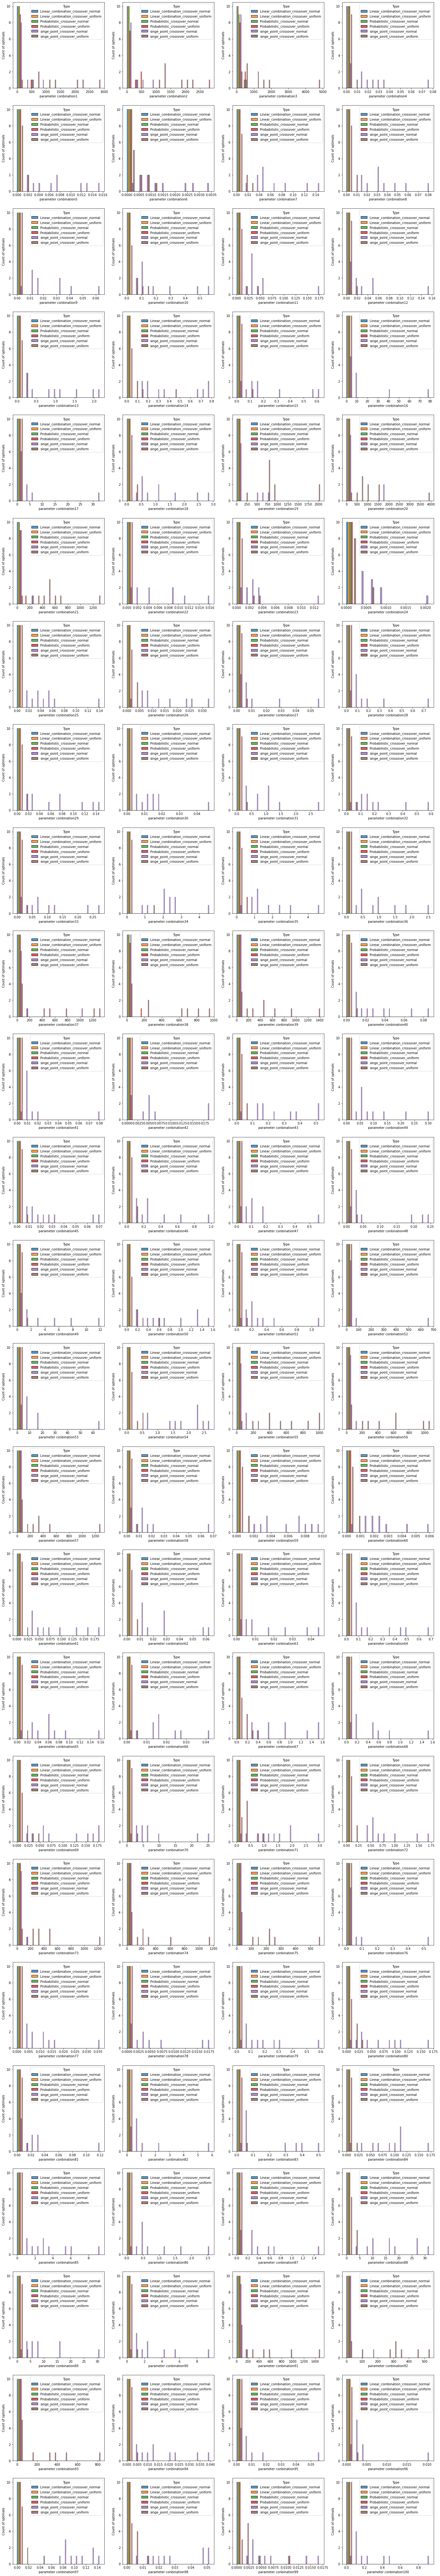

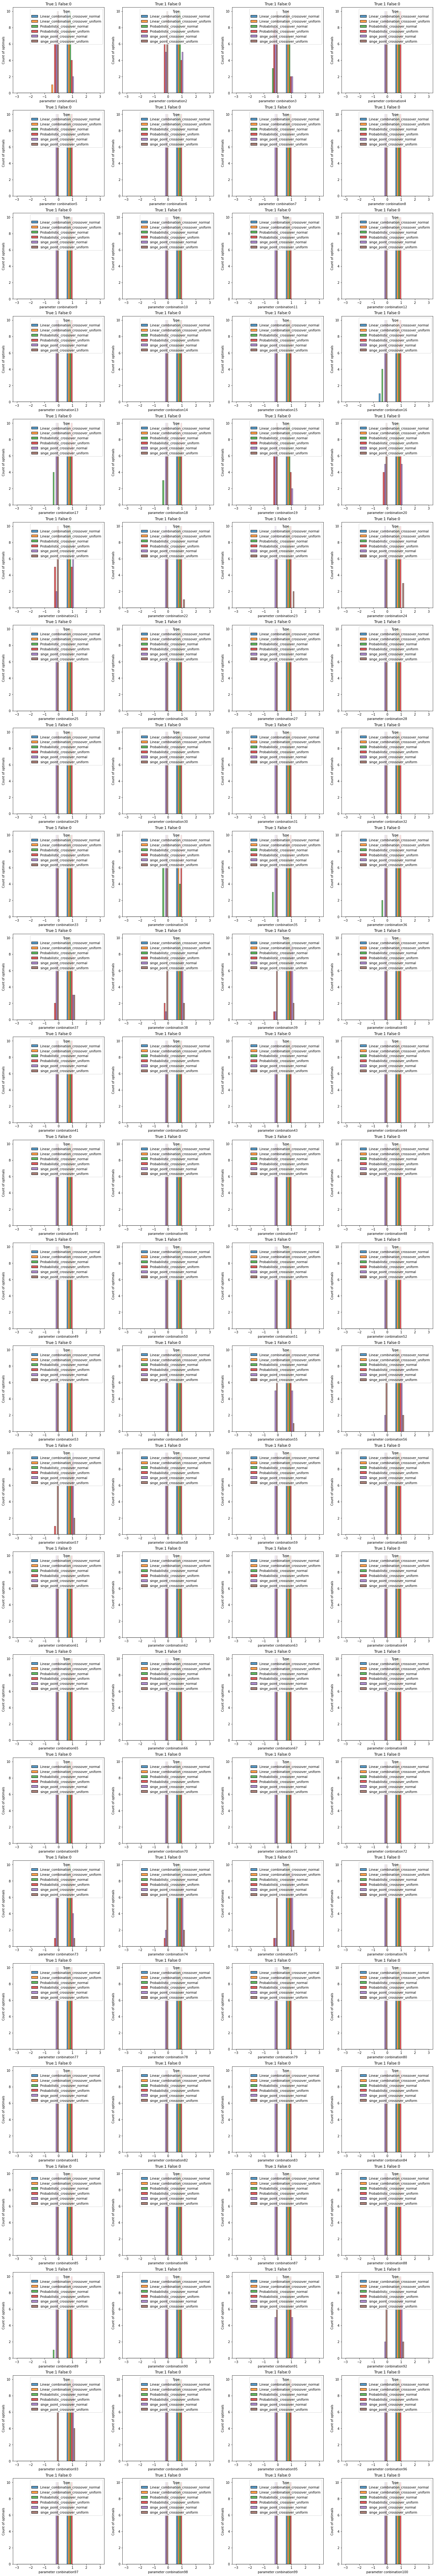

In [7]:
plot_overview(Function="F6",num_com=100,optimal=opt[5])

0    1    2   3    4    5    6   7  \
Type                                                                         
Linear_combination_crossover_normal    0%   0%   0%  0%   0%   0%  10%  0%   
Linear_combination_crossover_uniform  20%  10%  30%  0%   0%   0%   0%  0%   
Probabilistic_crossover_normal         0%  20%   0%  0%   0%   0%   0%  0%   
Probabilistic_crossover_uniform       20%  20%   0%  0%   0%   0%   0%  0%   
singe_point_crossover_normal           0%   0%  20%  0%  10%  10%   0%  0%   
singe_point_crossover_uniform          0%   0%   0%  0%   0%   0%   0%  0%   

                                       8   9   10  11  12  13  14   15   16  \
Type                                                                          
Linear_combination_crossover_normal   0%  0%   0%  0%  0%  0%  0%   0%  10%   
Linear_combination_crossover_uniform  0%  0%   0%  0%  0%  0%  0%   0%   0%   
Probabilistic_crossover_normal        0%  0%  10%  0%  0%  0%  0%  10%   0%   
Probabilistic_crossover_uniform       0%  0%   0%  0%  0%  0%  0%   0%   0%   
singe_point_crossover_normal          0%  0%   0%  0%  0%  0%  0%   0%   0%   
singe_point_crossover_uniform         0%  0%   0%  0%  0%  0%  0%   0%   0%   

                                      17   18   19   20   21  22  23  24  25  \
Type                                                                           
Linear_combination_crossover_normal   0%   0%   0%   0%   0%  0%  0%  0%  0%   
Linear_combination_crossover_uniform  0%  20%  10%   0%   0%  0%  0%  0%  0%   
Probabilistic_crossover_normal        0%  10%  10%   0%   0%  0%  0%  0%  0%   
Probabilistic_crossover_uniform       0%   0%   0%  10%   0%  0%  0%  0%  0%   
singe_point_crossover_normal          0%   0%   0%  10%   0%  0%  0%  0%  0%   
singe_point_crossover_uniform         0%   0%   0%   0%  10%  0%  0%  0%  0%   

                                      26  27  28  29  30  31  32  33  34  35  \
Type                                                                           
Linear_combination_crossover_normal   0%  0%  0%  0%  0%  0%  0%  0%  0%  0%   
Linear_combination_crossover_uniform  0%  0%  0%  0%  0%  0%  0%  0%  0%  0%   
Probabilistic_crossover_normal        0%  0%  0%  0%  0%  0%  0%  0%  0%  0%   
Probabilistic_crossover_uniform       0%  0%  0%  0%  0%  0%  0%  0%  0%  0%   
singe_point_crossover_normal          0%  0%  0%  0%  0%  0%  0%  0%  0%  0%   
singe_point_crossover_uniform         0%  0%  0%  0%  0%  0%  0%  0%  0%  0%   

                                       36   37   38  39  40  41  42   43  44  \
Type                                                                           
Linear_combination_crossover_normal    0%   0%  10%  0%  0%  0%  0%   0%  0%   
Linear_combination_crossover_uniform  10%   0%  20%  0%  0%  0%  0%  10%  0%   
Probabilistic_crossover_normal        10%   0%   0%  0%  0%  0%  0%   0%  0%   
Probabilistic_crossover_uniform        0%  20%  10%  0%  0%  0%  0%   0%  0%   
singe_point_crossover_normal           0%   0%   0%  0%  0%  0%  0%   0%  0%   
singe_point_crossover_uniform         10%   0%   0%  0%  0%  0%  0%  10%  0%   

                                       45  46  47  48  49  50  51  52  53  \
Type                                                                        
Linear_combination_crossover_normal    0%  0%  0%  0%  0%  0%  0%  0%  0%   
Linear_combination_crossover_uniform  10%  0%  0%  0%  0%  0%  0%  0%  0%   
Probabilistic_crossover_normal         0%  0%  0%  0%  0%  0%  0%  0%  0%   
Probabilistic_crossover_uniform        0%  0%  0%  0%  0%  0%  0%  0%  0%   
singe_point_crossover_normal           0%  0%  0%  0%  0%  0%  0%  0%  0%   
singe_point_crossover_uniform          0%  0%  0%  0%  0%  0%  0%  0%  0%   

                                       54   55   56  57  58  59  60  61   62  \
Type                                                                           
Linear_combination_crossover_normal   10%   0%   0%  0%  0%  0%  0%  0%  10%   
Li

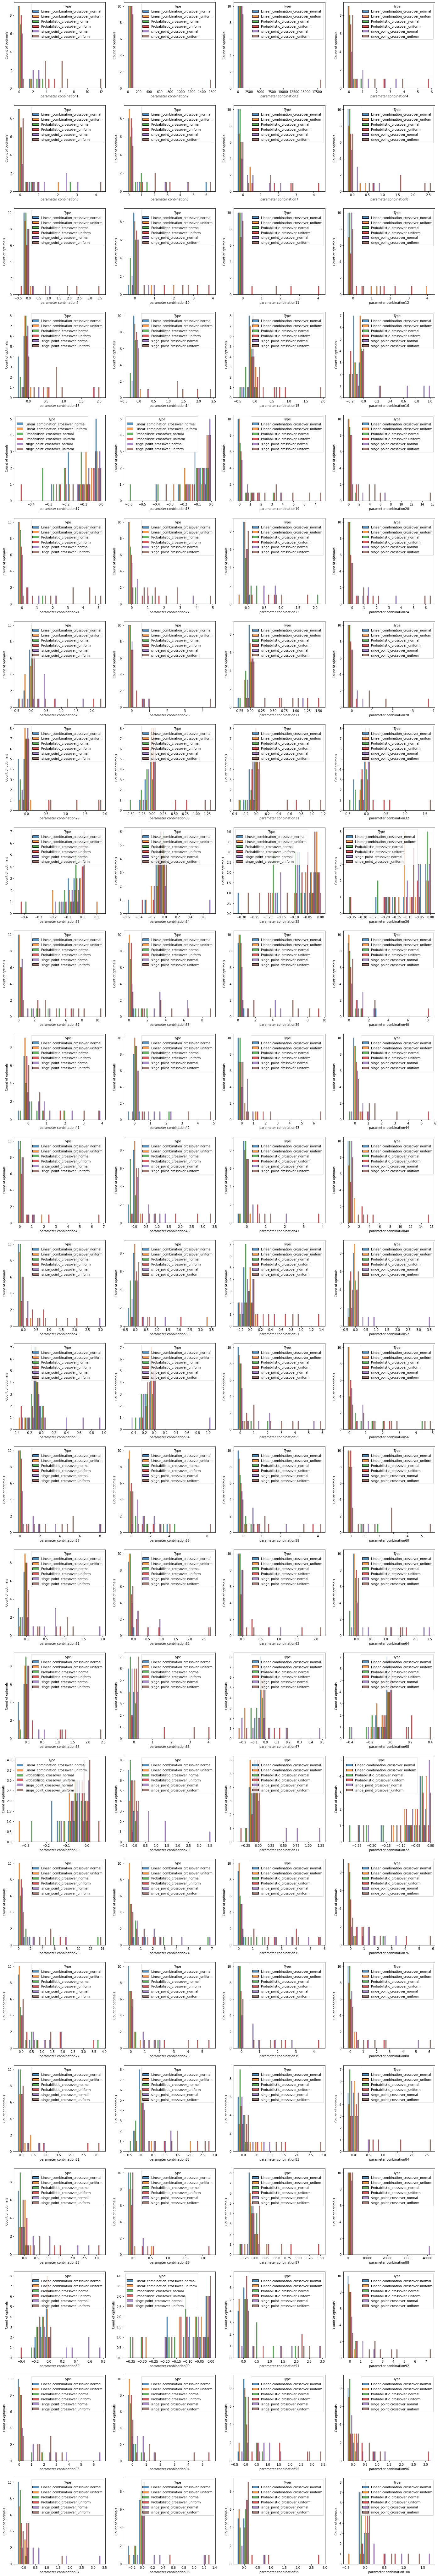

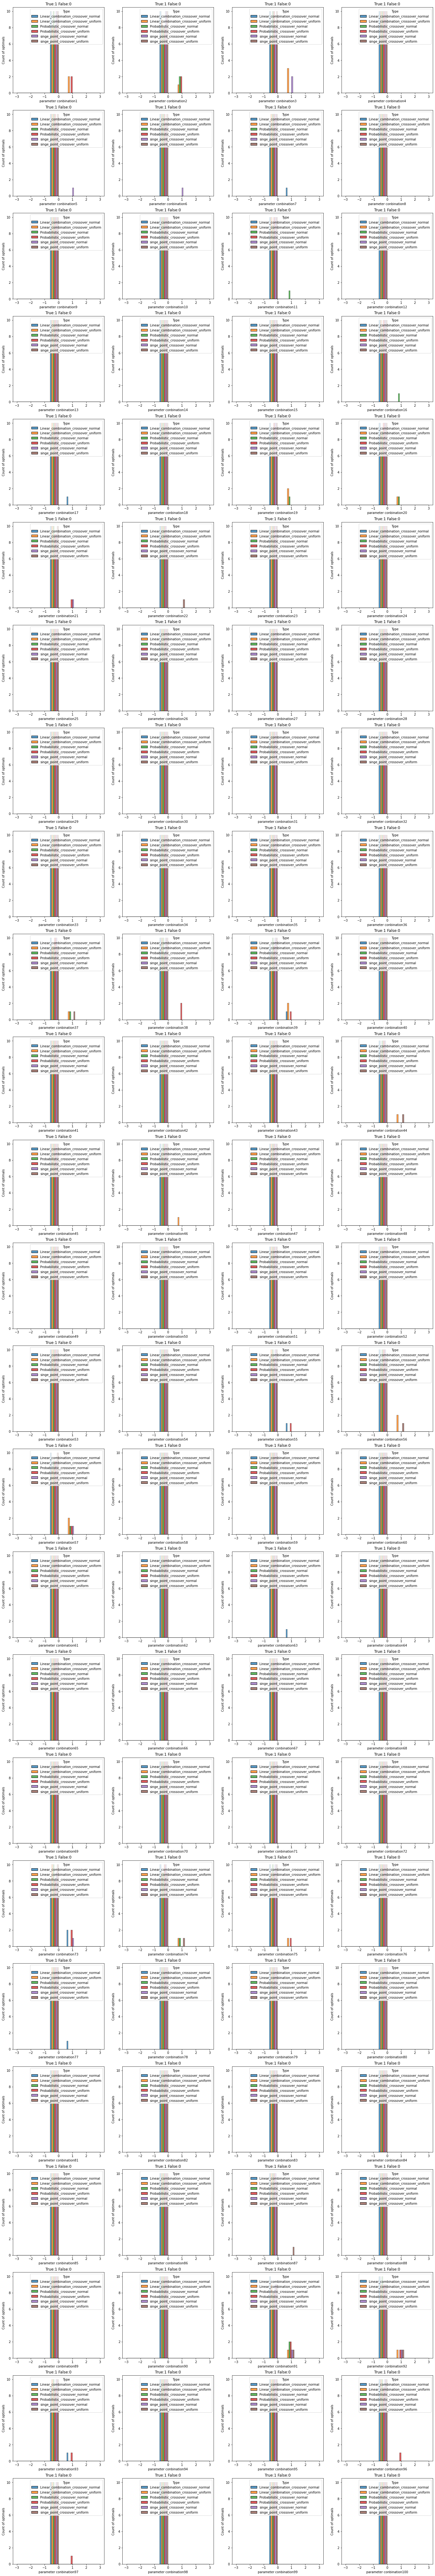

In [8]:
plot_overview(Function="F12",num_com=100,optimal=opt[11])

In [9]:
# def plot_overview(Function,num_com,optimal):
    
#     dataframe= df.loc[(Function,slice(None)), :]
#     dataframe = dataframe.round(4)
#     dataframe = pd.DataFrame(data=dataframe.values,
#                  columns=dataframe.columns)
#     columns = dataframe.columns.tolist()[:num_com]
#     percent_dataframe = dataframe.loc[:,dataframe.columns!="Type"].applymap(lambda x:True if x==optimal else False)
#     percent_dataframe["Type"] = dataframe["Type"]
#     percent_dataframe = percent_dataframe.groupby(["Type"]).sum().applymap(lambda x: str(x*10)+"%")
#     display(percent_dataframe)
#     i=1
#     max_value=dataframe.max(axis=0)
#     min_value=dataframe.min(axis=0)
#     for col in columns:
#         ax = plt.figure(figsize=(6,6))
#         ax = sns.histplot(data=dataframe, x=col, hue="Type",multiple="dodge",stat="count",
#                  binrange=(min_value[col],max_value[col]),binwidth=(max_value[col]-min_value[col])/15)
#         ax.set_xlabel("parameter conbination"+str(i))
#         ax.set_ylabel("Count of optimals")
#         plt.show()
#         plt.clf()
#         i=i+1